In [13]:
from align import *
import pandas as pd
import numpy as np
from Bio.Seq import Seq
import os

In [14]:
meta_data = pd.read_csv('screening1.csv')

In [17]:
for i in range(len(meta_data)//2):
    print('Working on Comparison #{}'.format(i+1))
    temp_df = meta_data[meta_data['Comparison #'] == i+1]
    ref_seq =  Seq(temp_df['Sequence'].iloc[0].upper())
    ref_name = temp_df['Region'].iloc[0]
    inp_seq = Seq(temp_df['Sequence'].iloc[1].upper())
    inp_name = temp_df['Region'].iloc[1]
    
    test1 = align2(inp_seq, ref_seq)
    test1.make_query()
    test1.init_aligner()
    test1.get_alignment()
    os.mkdir('screen2/pair{}_{}'.format(i+1, inp_name+'_'+ref_name))
    test1.results.to_csv('screen2/pair{}_{}/input_{}_refseq_{}.csv'.format(i+1, inp_name+'_'+ref_name, inp_name, ref_name))
    
    test2 = align2(ref_seq, inp_seq)
    test2.make_query()
    test2.init_aligner()
    test2.get_alignment()
    test2.results.to_csv('screen2/pair{}_{}/input_{}_refseq_{}.csv'.format(i+1, inp_name+'_'+ref_name, ref_name, inp_name))
    
    print()

Working on Comparison #1
Total 1323 sub-sequences were extracted!
Aligner initialized
Got 0 subsequence from 1323 segments
Total 1323 sub-sequences were extracted!
Aligner initialized
Got 0 subsequence from 1323 segments

Working on Comparison #2
Total 2547 sub-sequences were extracted!
Aligner initialized
Got 515 subsequence from 2547 segments
Total 2601 sub-sequences were extracted!
Aligner initialized
Got 380 subsequence from 2601 segments

Working on Comparison #3
Total 2223 sub-sequences were extracted!
Aligner initialized
Got 1448 subsequence from 2223 segments
Total 2223 sub-sequences were extracted!
Aligner initialized
Got 1451 subsequence from 2223 segments

Working on Comparison #4
Total 1746 sub-sequences were extracted!
Aligner initialized
Got 476 subsequence from 1746 segments
Total 1962 sub-sequences were extracted!
Aligner initialized
Got 600 subsequence from 1962 segments

Working on Comparison #5
Total 1323 sub-sequences were extracted!
Aligner initialized
Got 1197 sub

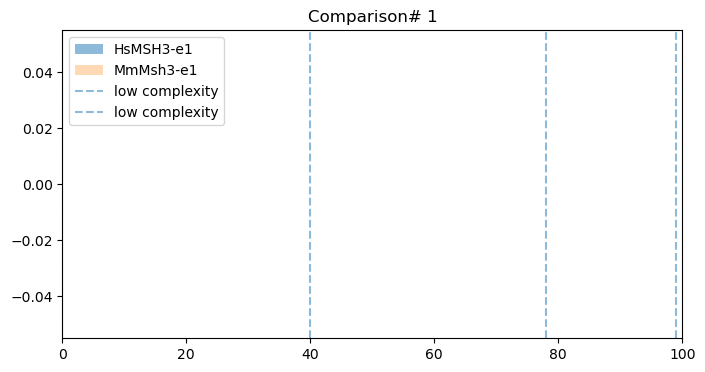

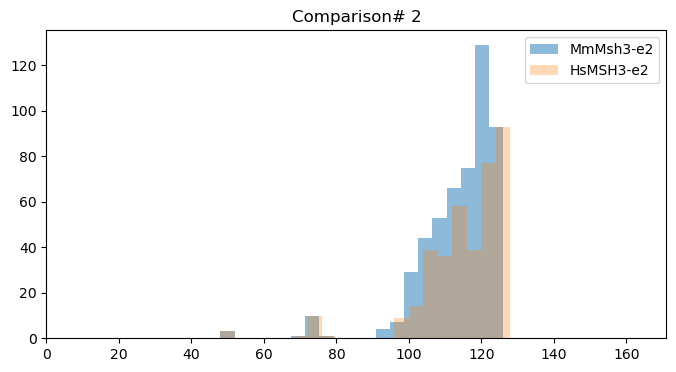

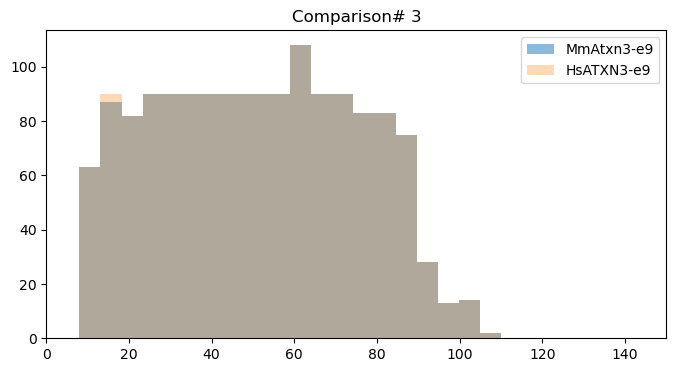

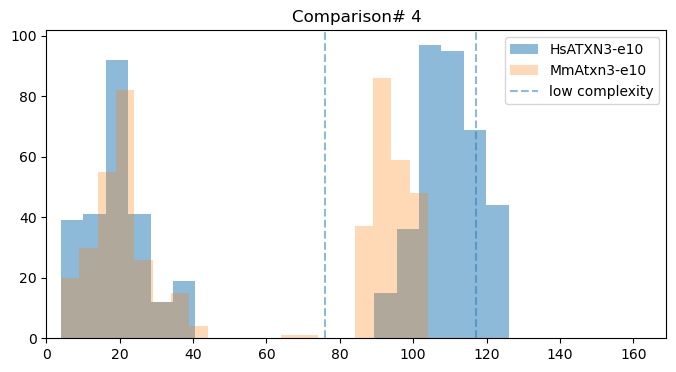

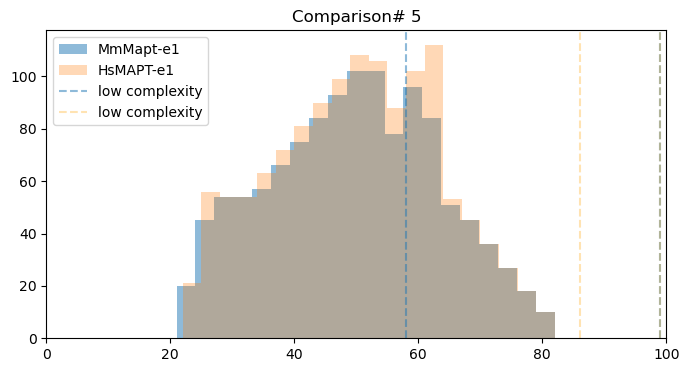

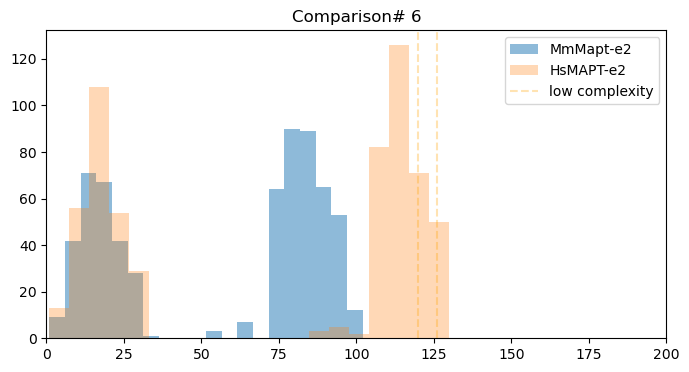

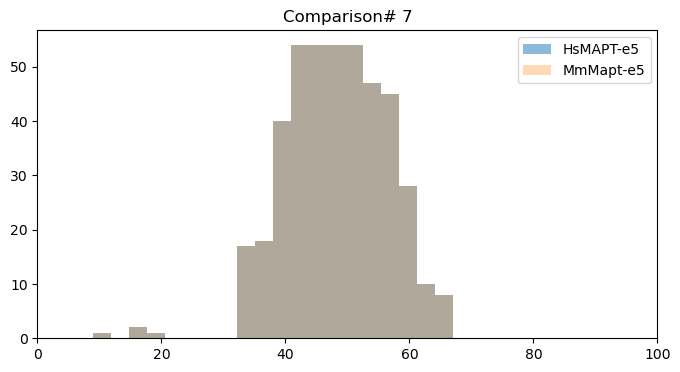

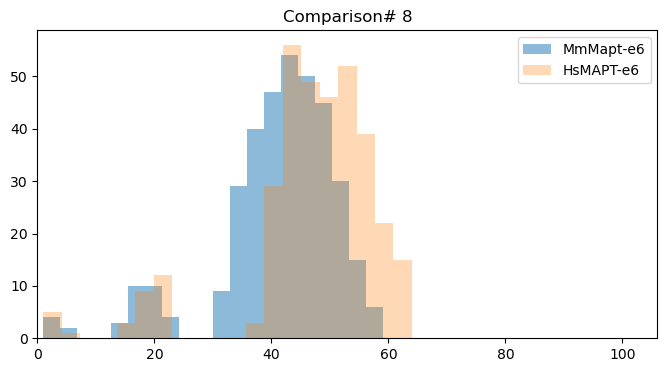

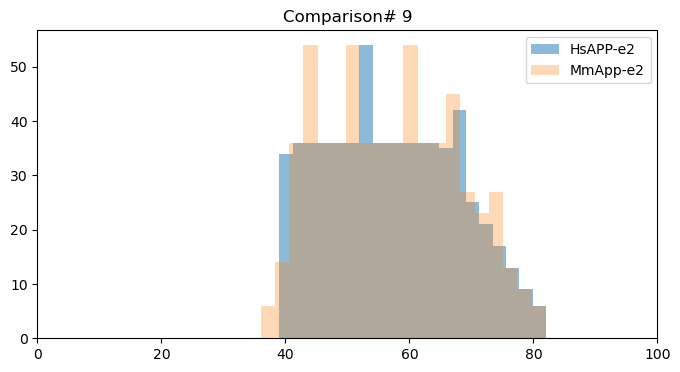

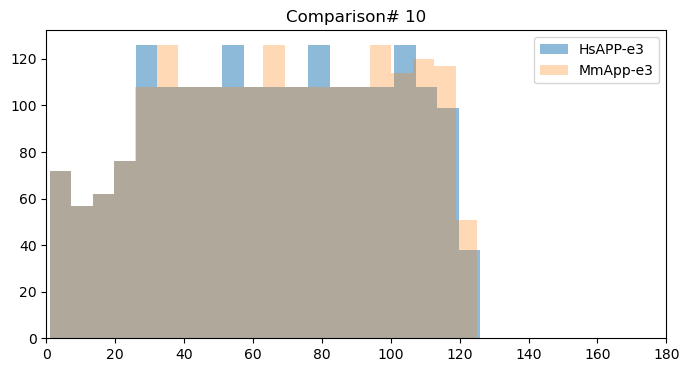

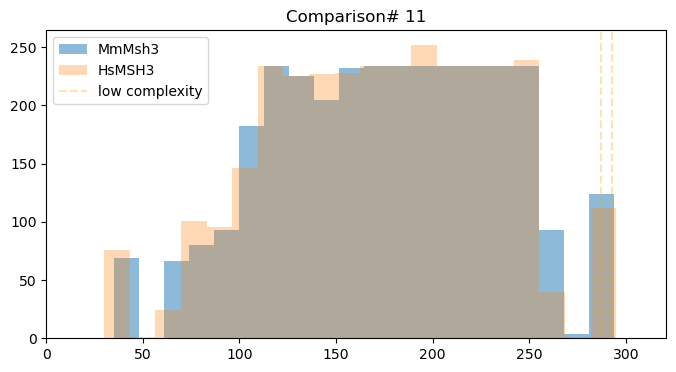

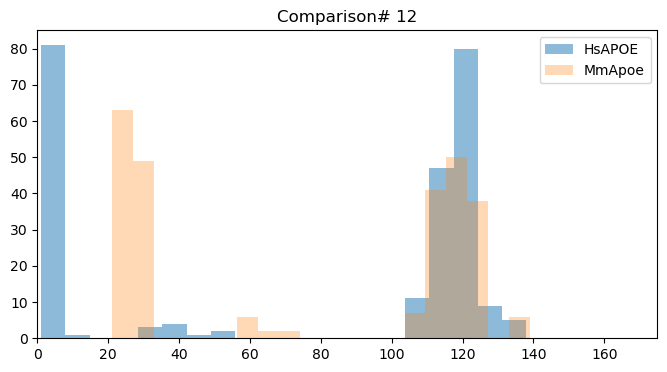

In [21]:
fns = [f for f in os.listdir('screen2') if f.startswith('pair')]
fns.sort(key=lambda x: int(x.split("_")[0].split('air')[1]),reverse=False)
for i in range(len(fns)):
    temp_wd = fns[i]
    twmp_wd_fn = os.listdir(os.path.join('screen2', temp_wd))
    df1 = pd.read_csv('screen2/{}/{}'.format(temp_wd, twmp_wd_fn[0]), index_col=0)
    df2 = pd.read_csv('screen2/{}/{}'.format(temp_wd, twmp_wd_fn[1]), index_col=0)

    # find all lowercase regions
    temp = meta_data[meta_data['Comparison #']==i+1]
    df1_low = [index for index, char in enumerate(temp['Sequence'].iloc[0]) if char.islower()]
    df2_low = [index for index, char in enumerate(temp['Sequence'].iloc[1]) if char.islower()]
    
    # plot overlapping
    fig = plt.figure(figsize=[8,4])
    _ = plt.hist(df1['Position'], bins=20, alpha=0.5, label=twmp_wd_fn[0].split('_')[1])
    _ = plt.hist(df2['Position'], bins=20, alpha=0.3, label=twmp_wd_fn[1].split('_')[1])

    # lowercase region
    if df1_low:
        if all(np.diff(df1_low) == 1): 
            plt.axvline(min(df1_low),ls='dashed', alpha=0.5,label='low complexity')
            plt.axvline(max(df1_low),ls='dashed', alpha=0.5)
        else:
            # find gaps 
            gaps = np.where((np.diff(df1_low) != 1) == True)[0]
            # get starts and end points 
            starts = min(df1_low)
            for j in range(len(gaps)):
                ends = df1_low[gaps[j]]
                plt.axvline(starts,ls='dashed', alpha=0.5,label='low complexity')
                plt.axvline(ends,ls='dashed', alpha=0.5)
                starts = df1_low[gaps[j]+1]
            ends = max(df1_low)
            plt.axvline(starts,ls='dashed', alpha=0.5,label='low complexity')
            plt.axvline(ends,ls='dashed', alpha=0.5)
            
    if df2_low:
        if all(np.diff(df2_low) == 1): 
            plt.axvline(min(df2_low),ls='dashed', alpha=0.3, color='orange', label='low complexity')
            plt.axvline(max(df2_low),ls='dashed', alpha=0.3, color='orange')
        else:
            # find gaps 
            gaps = np.where((np.diff(df2_low) != 1) == True)[0]
            # get starts and end points 
            starts = min(df2_low)
            for j in range(len(gaps)):
                ends = df2_low[gaps[j]]
                plt.axvline(starts,ls='dashed', alpha=0.5,label='low complexity')
                plt.axvline(ends,ls='dashed', alpha=0.5)
                starts = df1_low[gaps[j]+1]
            ends = max(df1_low)
            plt.axvline(starts,ls='dashed', alpha=0.5,label='low complexity')
            plt.axvline(ends,ls='dashed', alpha=0.5)
            
    plt.legend()
    plt.title('Comparison# {}'.format(temp_wd.split('_')[0].split('air')[1]))
    plt.xlim(0, len(temp['Sequence'].iloc[0]))
    plt.show()
    
    fig.savefig('screen2/plots/comparison_{}.png'.format(temp_wd.split('_')[0].split('air')[1]))

# debug

In [5]:
temp_df = meta_data[meta_data['Comparison #'] == 1]
ref_seq =  Seq(temp_df['Sequence'].iloc[0].upper())
ref_name = temp_df['Region'].iloc[0]
inp_seq = Seq(temp_df['Sequence'].iloc[1].upper())
inp_name = temp_df['Region'].iloc[1]
    
test1 = align2(inp_seq, ref_seq)
test1.make_query()
test1.init_aligner()
test1.get_alignment(0.6)
#os.mkdir('screen1/pair{}_{}'.format(i+1, inp_name+'_'+ref_name))
#test1.results.to_csv('screen1/pair{}_{}/input_{}_refseq_{}.csv'.format(i+1, inp_name+'_'+ref_name, inp_name, ref_name))
    
test2 = align2(ref_seq, inp_seq)
test2.make_query()
test2.init_aligner()
test2.get_alignment(0.6)
#test2.results.to_csv('screen1/pair{}_{}/input_{}_refseq_{}.csv'.format(i+1, inp_name+'_'+ref_name, ref_name, inp_name))
    

Total 1323 sub-sequences were extracted!
Aligner initialized
Got 0 subsequence from 1323 segments
Total 1323 sub-sequences were extracted!
Aligner initialized
Got 0 subsequence from 1323 segments
